In [1]:
#✅ Part 1: Load & Preprocess Dataset

# Basic libraries
import numpy as np
import pandas as pd
import os

# Date/time
from datetime import date
from time import strftime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Model and training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)


## 2. Load and Read the Data

We load the data in a pandas dataframe called df and return the name of each columns.

In [2]:
# Load dataset
df = pd.read_csv("KaggleV2-May-2016.csv", converters={"PatientId":str})
print(df.head())

         PatientId  AppointmentID Gender          ScheduledDay  \
0   29872499824296        5642903      F  2016-04-29T18:38:08Z   
1  558997776694438        5642503      M  2016-04-29T16:08:27Z   
2    4262962299951        5642549      F  2016-04-29T16:19:04Z   
3     867951213174        5642828      F  2016-04-29T17:29:31Z   
4    8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0         

## 3. Basic Data Information

This section will provide basic informtion about the data: 

In [3]:
# print the number of rows and columns
print("df shape:",df.shape)

df shape: (110527, 14)


In [4]:
# print the basic information: missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(8), object(6)
memory usage: 11.8+ MB


The data has no missing values.

In [5]:
# print a summary of the data in df
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In the table above, the first number, the count, shows how many rows have non-missing values. In this instance, we have no missing values.

The second value is the mean, which is the average. Patients in df are on average 37 years old. Under that, std is the standard deviation, which measures how numerically spread out the values are, in other word it tell how close to the mean the datpoints are.

The column Age has a minimum age of -1 which is erronous data, likewise,the maximum age is 115 years old which seems very high as Brazil's life expectancy for 2020 is 77 years old (please see [here](https://www.worldometers.info/demographics/brazil-demographics/#median-age)). We will deal with these errors in next section.

The column Handcap should be binary (True or False) but it has a max value of 4. This will need to be investigated,

In [6]:
# print unique values for each columns
print('Values in Gender:', df.Gender.unique())
print('Values in Neighbourhood:',df.Neighbourhood.unique())
print('Values in Scholarship:',df.Scholarship.unique())
print('Values in Hipertension:',df.Hipertension.unique())
print('Values in Diabetes:',df.Diabetes.unique())
print('Values in Alcoholism:',df.Alcoholism.unique())
print('Values in Handcap:',df.Handcap.unique())
print('Values in SMS_received:',df.SMS_received.unique())
print('Values in No-show:', df['No-show'].unique())

Values in Gender: ['F' 'M']
Values in Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZ

In [7]:
print(df['Handcap'].value_counts())
# print the number of unique values in Neighbourhood
print('Number of unique values in Neighbourhood:',df.Neighbourhood.nunique())

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64
Number of unique values in Neighbourhood: 81


## 4. Data Cleansing

In this section, we want to amend some columns in df, such as the data type, misspellings and erronous data:

* ScheduledDay and AppointmentDay are currently objects, it will be converted them into datetime
* AppointmentDay's time will be dropped (as it is set as 00:00:00)
* Misspelled columns are going to be renamed
* Erronous data from the Age column will be deleted

In [8]:
# Basic cleaning

# Renaming columns
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.rename(columns={'Handcap' : "Handicap"}, inplace=True)

# Convert target
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})

# Sort by patient and appointment date
df = df.sort_values(by=['PatientId', 'ScheduledDay'])

# Create new features
df['Total_Prior_Appointments'] = df.groupby('PatientId').cumcount()
df['Total_Missed_Appointments'] = df.groupby('PatientId')['No_show'].cumsum().shift(fill_value=0)

# Encode categorical
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

Converting String type to Date-Time format & Extracting date from Scheduled Day, Appointment Day and 
Addind Waitingdays (diff. btw AppointmentDay and ScheduledDay)

In [9]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]) # COnverting Date from String type to Datetime format
df['ScheduledDate'] = df['ScheduledDay'].dt.date 

df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]) ##COnverting Date from String type to Datetime format
df['AppointmentDate'] = df['AppointmentDay'].dt.date

df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Total_Prior_Appointments,Total_Missed_Appointments,ScheduledDate,AppointmentDate,WaitingDays
84473,11111462625267,5715720,0,2016-05-18 14:58:29+00:00,2016-06-08 00:00:00+00:00,65,REPÚBLICA,0,1,0,0,0,1,0,0,0,2016-05-18,2016-06-08,20
51059,111124532532143,5531224,1,2016-03-31 09:17:26+00:00,2016-05-03 00:00:00+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,0,0,0,2016-03-31,2016-05-03,32
95359,111124532532143,5624030,1,2016-04-26 15:05:58+00:00,2016-06-01 00:00:00+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,2016-04-26,2016-06-01,35
60744,11114485119737,5621757,0,2016-04-26 10:46:38+00:00,2016-05-25 00:00:00+00:00,12,MARIA ORTIZ,0,0,0,0,0,1,1,0,1,2016-04-26,2016-05-25,28
2321,11116239871275,5625265,0,2016-04-27 07:05:38+00:00,2016-04-29 00:00:00+00:00,13,SÃO PEDRO,0,0,0,0,0,0,0,0,1,2016-04-27,2016-04-29,1


 Checking whether any Appointment days are before Scheduled days

In [10]:
len(df[df["AppointmentDay"] < df["ScheduledDay"]])

38568

**'AppointmentDay' has no value for time of the day and it has many values(38568) smaller than 'ScheduledDay' which is not possible !** </span>

**The reason for this problem is that probably these appointments happened at the same day that they're booked but because we don't have the exact hour for 'AppointmentDay' their difference is negative.** </span>

**To solve this problem, we added 23 hrs and 59 min and 59 secs to the 'AppointmentDay'. Now all 'AppointmentDay' are still at the same the same day but we only have 5 negative values for:** </span>
<span>**df["AppointmentDay"] - df["ScheduledDay"]** </span>

In [11]:
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Total_Prior_Appointments,Total_Missed_Appointments,ScheduledDate,AppointmentDate,WaitingDays
84473,11111462625267,5715720,0,2016-05-18 14:58:29+00:00,2016-06-08 23:59:59+00:00,65,REPÚBLICA,0,1,0,0,0,1,0,0,0,2016-05-18,2016-06-08,20
51059,111124532532143,5531224,1,2016-03-31 09:17:26+00:00,2016-05-03 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,0,0,0,2016-03-31,2016-05-03,32
95359,111124532532143,5624030,1,2016-04-26 15:05:58+00:00,2016-06-01 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,2016-04-26,2016-06-01,35
60744,11114485119737,5621757,0,2016-04-26 10:46:38+00:00,2016-05-25 23:59:59+00:00,12,MARIA ORTIZ,0,0,0,0,0,1,1,0,1,2016-04-26,2016-05-25,28
2321,11116239871275,5625265,0,2016-04-27 07:05:38+00:00,2016-04-29 23:59:59+00:00,13,SÃO PEDRO,0,0,0,0,0,0,0,0,1,2016-04-27,2016-04-29,1


In [12]:
len(df[ df.AppointmentDay < df.ScheduledDay ])

5

**Now we have only 5 rows where ScheduledDay is later than AppointmentDay which can be dropped** </span>

In [13]:
df.drop( df[df.AppointmentDay <= df.ScheduledDay].index, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Total_Prior_Appointments,Total_Missed_Appointments,ScheduledDate,AppointmentDate,WaitingDays
84473,11111462625267,5715720,0,2016-05-18 14:58:29+00:00,2016-06-08 23:59:59+00:00,65,REPÚBLICA,0,1,0,0,0,1,0,0,0,2016-05-18,2016-06-08,20
51059,111124532532143,5531224,1,2016-03-31 09:17:26+00:00,2016-05-03 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,0,0,0,2016-03-31,2016-05-03,32
95359,111124532532143,5624030,1,2016-04-26 15:05:58+00:00,2016-06-01 23:59:59+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,2016-04-26,2016-06-01,35
60744,11114485119737,5621757,0,2016-04-26 10:46:38+00:00,2016-05-25 23:59:59+00:00,12,MARIA ORTIZ,0,0,0,0,0,1,1,0,1,2016-04-26,2016-05-25,28
2321,11116239871275,5625265,0,2016-04-27 07:05:38+00:00,2016-04-29 23:59:59+00:00,13,SÃO PEDRO,0,0,0,0,0,0,0,0,1,2016-04-27,2016-04-29,1


1 Extracting day name from Scheduled day, Appointment day
2 Adding "Lead days" column

In [14]:
# for Scheduled day
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDayOfDate']=df['ScheduledDay'].dt.date
df['ScheduledDayOfDate']=pd.to_datetime(df['ScheduledDayOfDate'])
df['ScheduledDayOfDate'] = df['ScheduledDayOfDate'].dt.day_name()
# for Appointment day
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDayOfDate']=df['AppointmentDay'].dt.date
df['AppointmentDayOfDate']=pd.to_datetime(df['AppointmentDayOfDate'])
df['AppointmentDayOfDate'] = df['AppointmentDayOfDate'].dt.day_name()

# Adding "Lead days" column
df['LeadDays'] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days

df.head()
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show',
       'Total_Prior_Appointments', 'Total_Missed_Appointments',
       'ScheduledDate', 'AppointmentDate', 'WaitingDays', 'ScheduledDayOfDate',
       'AppointmentDayOfDate', 'LeadDays'],
      dtype='object')

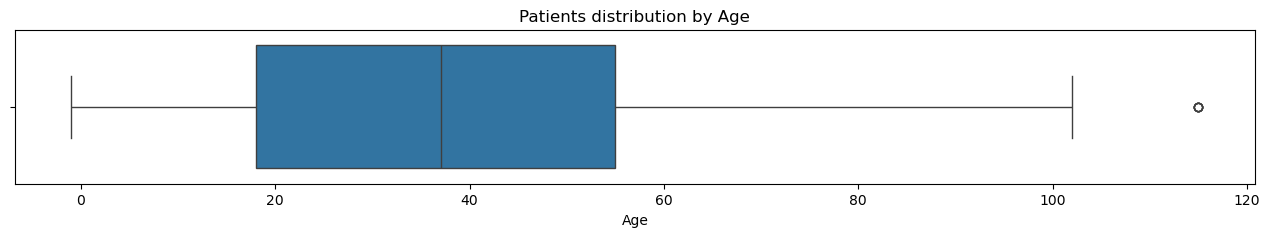

In [15]:
# Look at the distribution of the Age feature
plt.figure(figsize=(16,2))
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

Most the patients are between 18 and 55 years old. The patients who are 115 years old are outliars, we will therefore drop these rows as well as the row of the patients aged -1.

In [16]:
# delete patients that are over 102
df = df.drop(df[df.Age > 102].index)
# delete the patients that are negative
df = df.drop(df[df.Age < 0].index)

## 5. Exploratory Data Analysis
**What are the major factors contributing to No Shows of patients ?** </span>

### 5.1 Overview of No-Show

In [17]:
# check the total percentage of no show
pd.DataFrame(df.groupby('No_show')['PatientId'].count()).apply(lambda x : x / sum(x) * 100)

,PatientId
No_show,
0,79.811973
1,20.188027


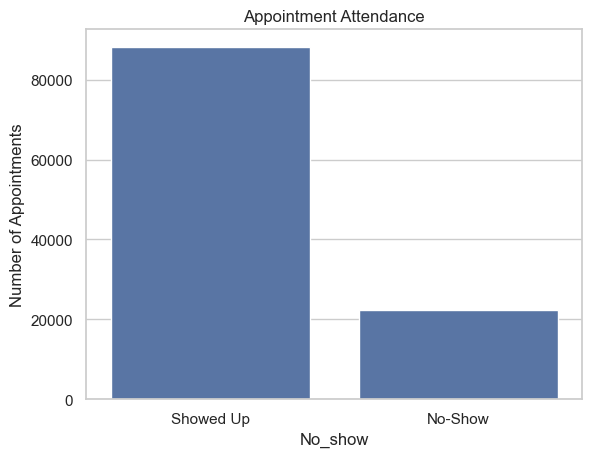

In [18]:
# 1. No-show distribution

# Set plot style
sns.set(style="whitegrid")

sns.countplot(data=df, x="No_show")
plt.title("Appointment Attendance")
plt.xticks([0, 1], ["Showed Up", "No-Show"])
plt.ylabel("Number of Appointments")
plt.show()

From the table above, we can clearly see that 'Female' patients usually have more appointments that 'Male' patients, they also have about the double number of missed appointment. However, looking at the percentage of missed appointments by gender shows that it is almost the same rate (about 20%). Therefore, gender does not seem to be an important feature. 

### 5.2 Finding Duplicates

In [19]:
# check for duplicated rows
dups = df[df.duplicated() == True].count()

# check for duplicated patients
dups_id = df['PatientId'][df['PatientId'].duplicated() == True].count()

print('Duplicated rows: ', dups.sum())
print('Duplicated patient ids: ', dups_id)

Duplicated rows:  0
Duplicated patient ids:  48220


The dataset does not have duplicated appointments but has 48,228 patients that can be considered as returning/known patients.

### 5.3 Gender

In [20]:
# table with the gender and the number of patient that missed or attended their appointment
gender_tbl = pd.DataFrame(df.groupby(['Gender','No_show'])['PatientId'].count()).reset_index()
gender_tbl

,Gender,No_show,PatientId
0,0,0,57243
1,0,1,14588
2,1,0,30962
3,1,1,7723


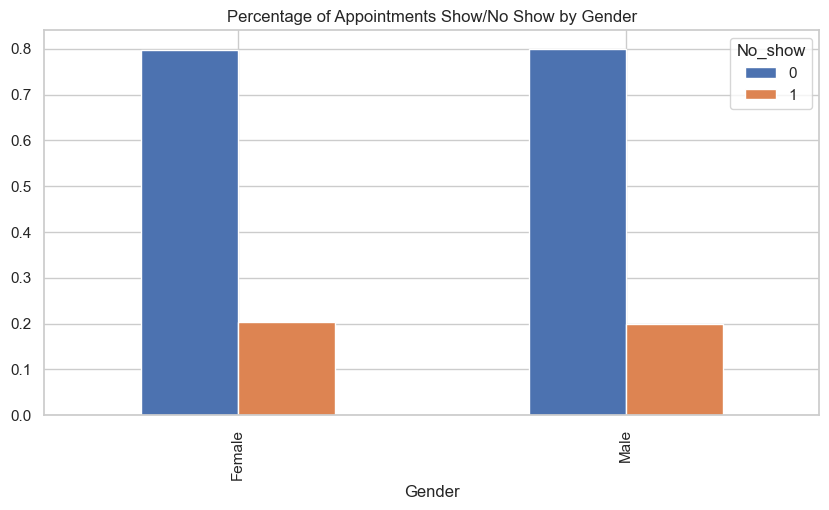

Percentage of Appointments Show/No Show by Gender
        Showed Up  No-Show
Gender                    
Female      79.69    20.31
Male        80.04    19.96


In [21]:
# appointment attendance by gender
gender = df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
plt.xticks([0, 1], ["Female", "Male"])
gender.set_title("Percentage of Appointments Show/No Show by Gender")
plt.show()

print("Percentage of Appointments Show/No Show by Gender")
percentages = df.groupby(df['Gender'].map({0: 'Female', 1: 'Male'}), observed=True)['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

From the table above, we can clearly see that 'Female' patients usually have more appointments that 'Male' patients, they also have about the double number of missed appointment. However, looking at the percentage of missed appointments by gender shows that it is almost the same rate (about 20%). Therefore, gender does not seem to be an important feature. 

### 5.4 Age

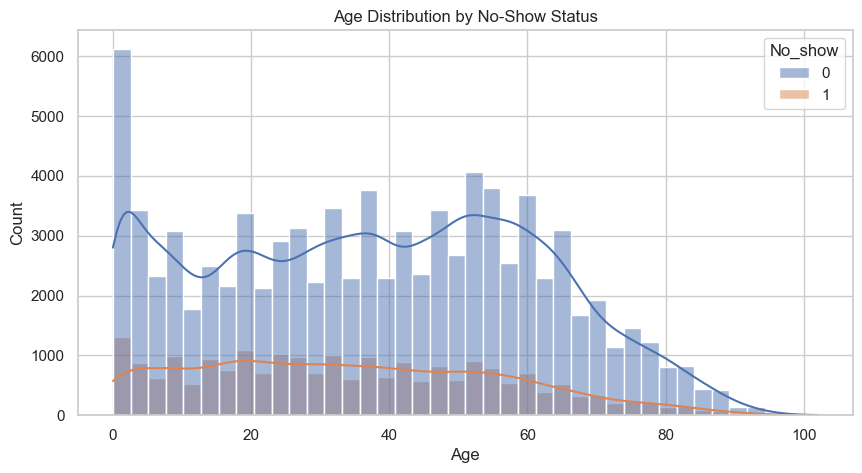

In [22]:
# 2. Age distribution by no-show status
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Age", hue="No_show", bins=40, kde=True)
plt.title("Age Distribution by No-Show Status")
plt.show()

#### Now, we classify age of the Patients into 5 categories

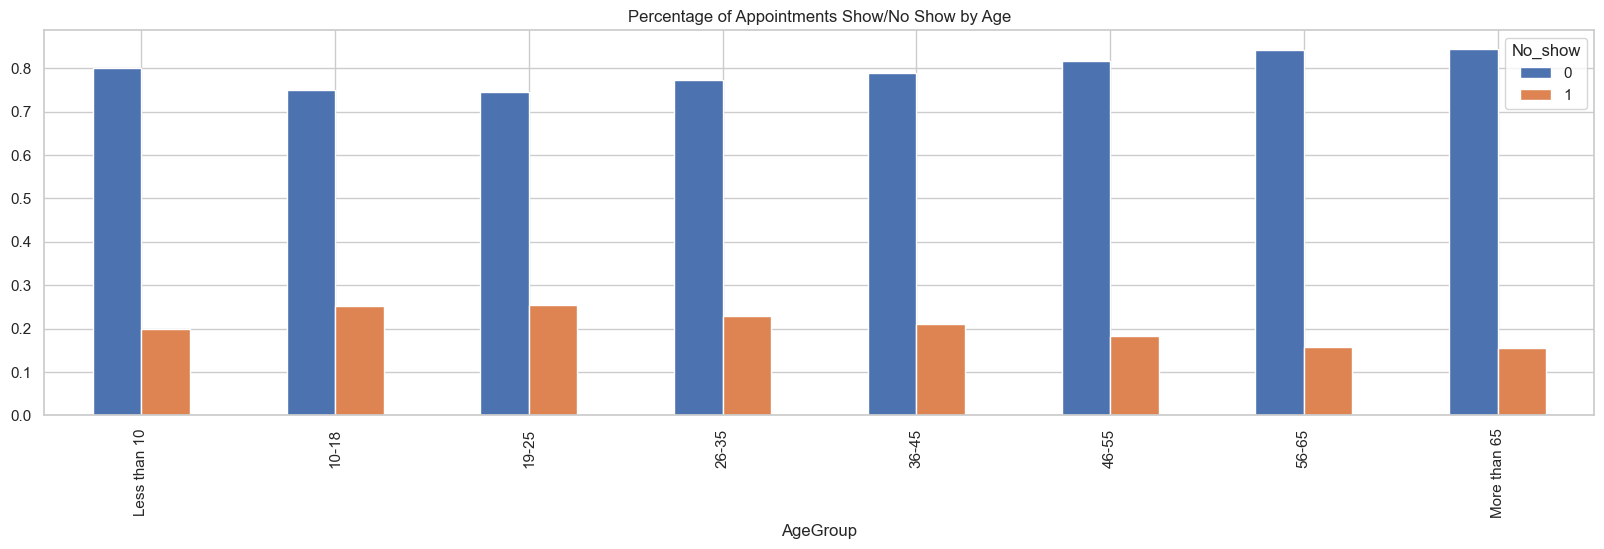

In [23]:
# create age groups using the distribution plotted in section 4
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.groupby(['AgeGroup'], observed=True)['PatientId'].count()

# appointment attendance by age
age = df.groupby('AgeGroup', observed=True)['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
age.set_title("Percentage of Appointments Show/No Show by Age")
plt.show()

The patients that seems most likely to not show-up for their appointments are between 10 and 35 years old.

### 5.5 SMS Received

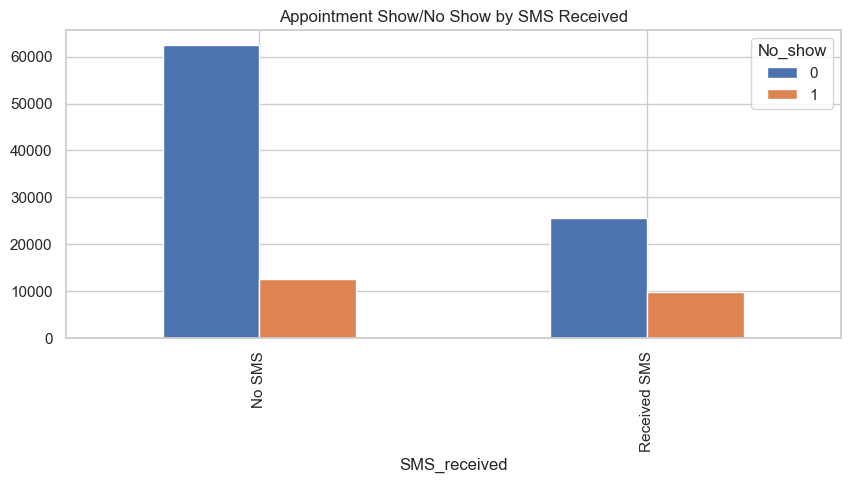

Percentage of Appointment Show/No Show by SMS Received
              Showed Up  No-Show
SMS_received                    
No SMS            83.31    16.69
Received SMS      72.42    27.58


In [24]:
# 4. SMS received vs no-show

# barchart showing number of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by SMS Received")
plt.xticks([0, 1], ["No SMS", "Received SMS"])
plt.show()

# barchart showing the percentage of show/ no-show by SMS Received
print("Percentage of Appointment Show/No Show by SMS Received")
percentages = df.groupby(df['SMS_received'].map({0: 'No SMS', 1: 'Received SMS'}))['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

The graphs above do not show expected results: 38% appointments for patients that received the sms were missed while 20% of the appointments for patients that did not received a sms. This feature seem to be important in dertermining appointments no show.

### 5.6 Neighbourhood

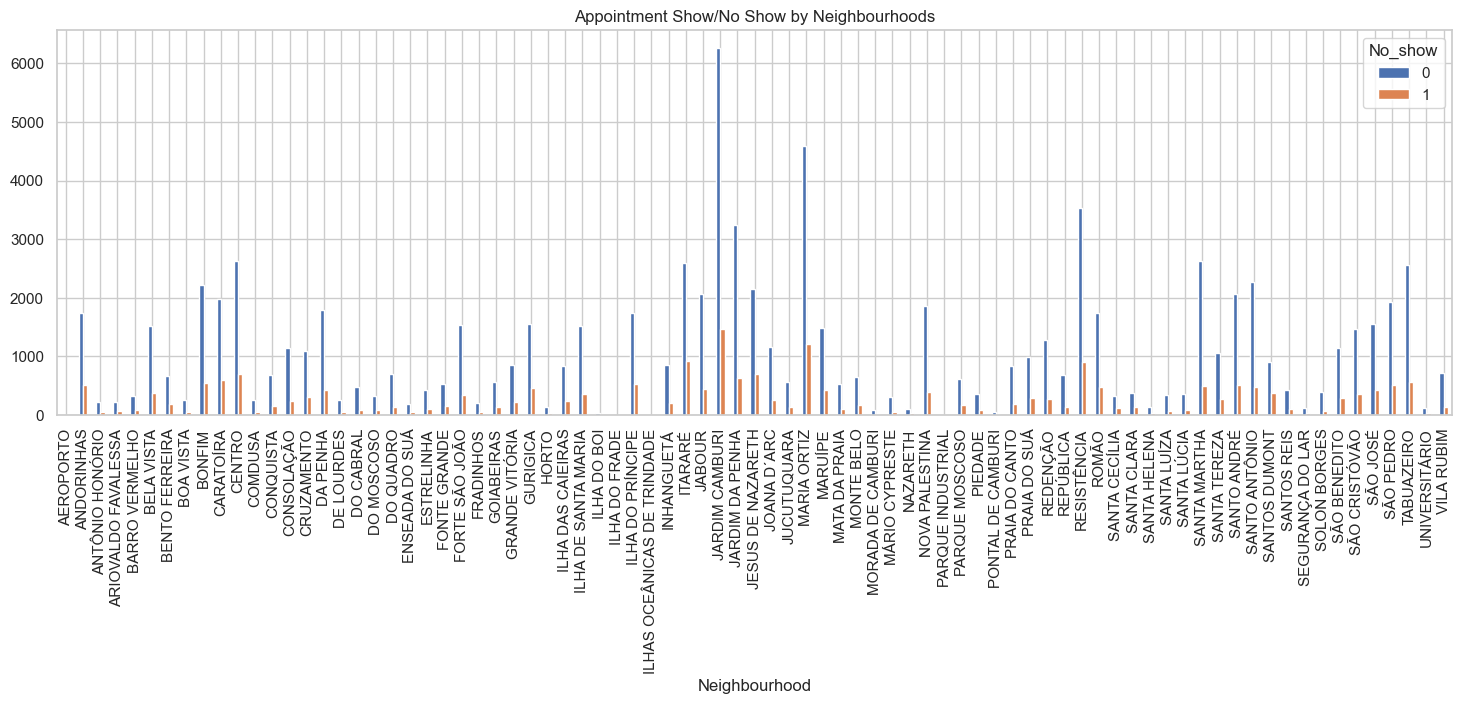

Percentage of Appointment Show/No Show by Neighbourhoods
                     Showed Up  No-Show
Neighbourhood                          
AEROPORTO                87.50    12.50
ANDORINHAS               77.06    22.94
ANTÔNIO HONÓRIO          81.55    18.45
ARIOVALDO FAVALESSA      78.01    21.99
BARRO VERMELHO           78.49    21.51
...                        ...      ...
SÃO JOSÉ                 78.34    21.66
SÃO PEDRO                78.96    21.04
TABUAZEIRO               81.73    18.27
UNIVERSITÁRIO            78.95    21.05
VILA RUBIM               83.43    16.57

[81 rows x 2 columns]


In [25]:
# barchart showing number of show/ no-show by Neighbourhoods
day_of_week = df.groupby('Neighbourhood')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Neighbourhoods")
plt.show()

# barchart showing percentage of show/ no-show by Neighbourhoods
print("Percentage of Appointment Show/No Show by Neighbourhoods")
percentages = df.groupby('Neighbourhood')['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

Most of the neighbourhouds have a no show rate of about 20%, the significant drops and peaks are because of the porr representation of a particalar neigbourhood in the dataset rather than because it is significant. Therefre, this feature does not seem to be important for the no show prediction.

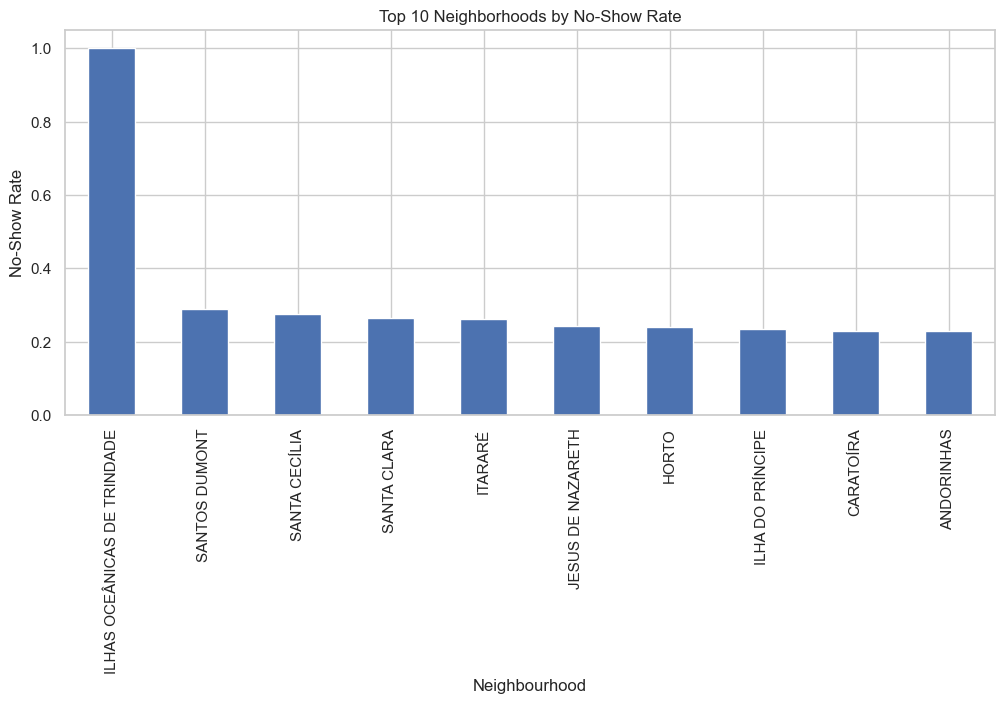

In [26]:
# 5. No-show rate by neighborhood (top 10)
no_show_rate_by_area = df.groupby("Neighbourhood")["No_show"].mean().sort_values(ascending=False).head(10)
no_show_rate_by_area.plot(kind="bar", figsize=(12, 5), title="Top 10 Neighborhoods by No-Show Rate")
plt.ylabel("No-Show Rate")
plt.show()

### 5.7 Scheduled Day

## Looking at the time of the booking

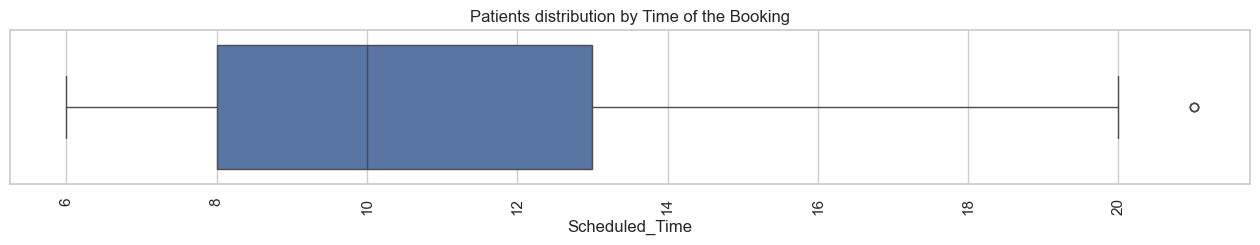

In [27]:
# split ScheduledDay to get the time of the booking stored in Scheduled_Time
df['Scheduled_Time'] = pd.to_datetime(df['ScheduledDay']).dt.hour

# Look at the distribution of Scheduled_Time
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Scheduled_Time)
dist_age.set_title("Patients distribution by Time of the Booking")
plt.show()

The booking are made between 6am and 8pm. There are three bookings that have been taken at 9pm, although these are showed as outliars on the plot above, they will not be dropped as they could be the results of emergencies.

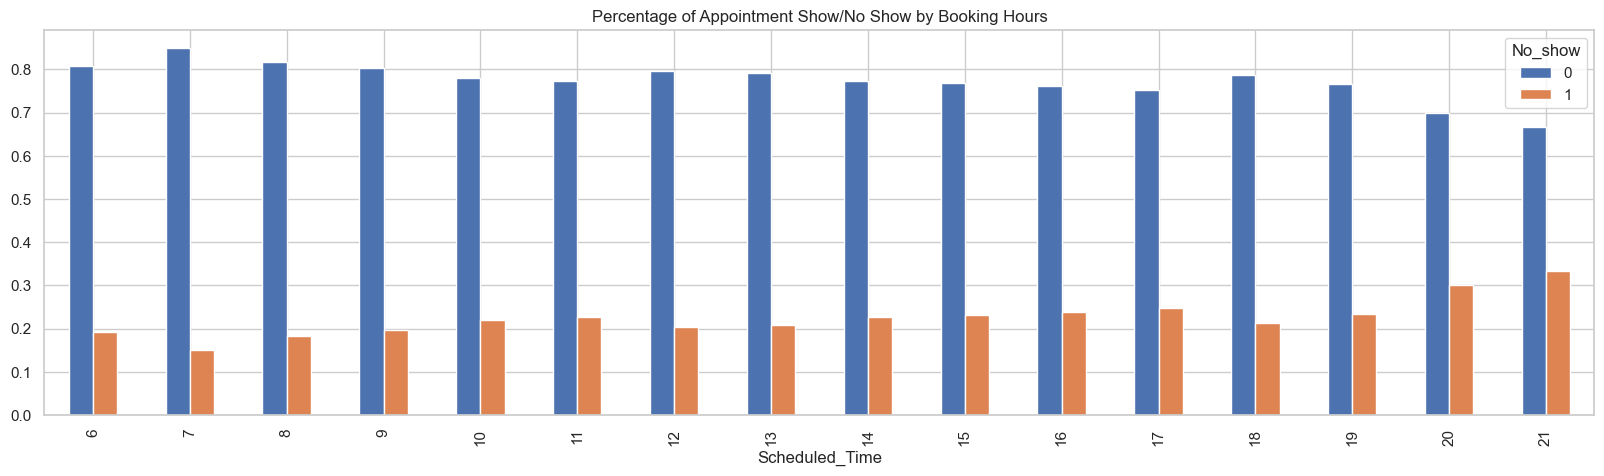

In [28]:
# barchart showing percentage of show/ no-show by hours
appt_h = df.groupby('Scheduled_Time')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
appt_h.set_title("Percentage of Appointment Show/No Show by Booking Hours")
plt.show()

Percentage of Appointment Show/No Show by Booking Time of the Day
                  Showed Up  No-Show
Scheduled_Period                    
Morning               81.70    18.30
Afternoon             77.71    22.29
Evening               76.20    23.80


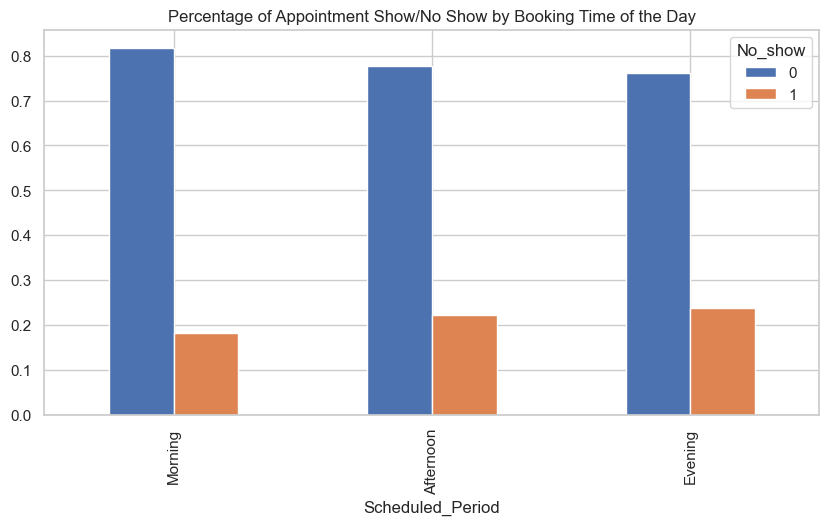

In [29]:
# create three groupes for morning, afternoon and evening appointments
bins= [6,11,17,22]
labels = ['Morning','Afternoon','Evening']
df['Scheduled_Period'] = pd.cut(df['Scheduled_Time'], bins=bins, labels=labels, right=False)

# barchart showing percentage of show/ no-show by time of the day
print("Percentage of Appointment Show/No Show by Booking Time of the Day")
percentages = df.groupby('Scheduled_Period', observed=True)['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

appt_tod = df.groupby('Scheduled_Period', observed=True)['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
appt_tod.set_title("Percentage of Appointment Show/No Show by Booking Time of the Day")
plt.show()


Morning bookings seem less likely to be missed than afternoon and evening ones.

#### Looking at the day of booking

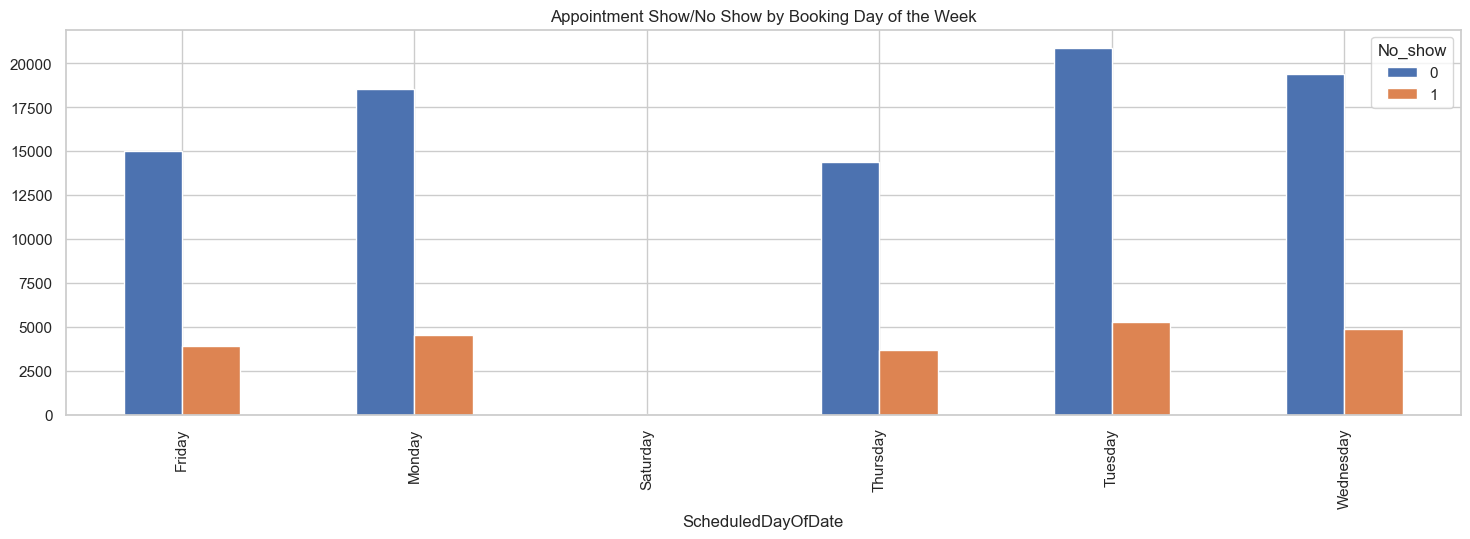

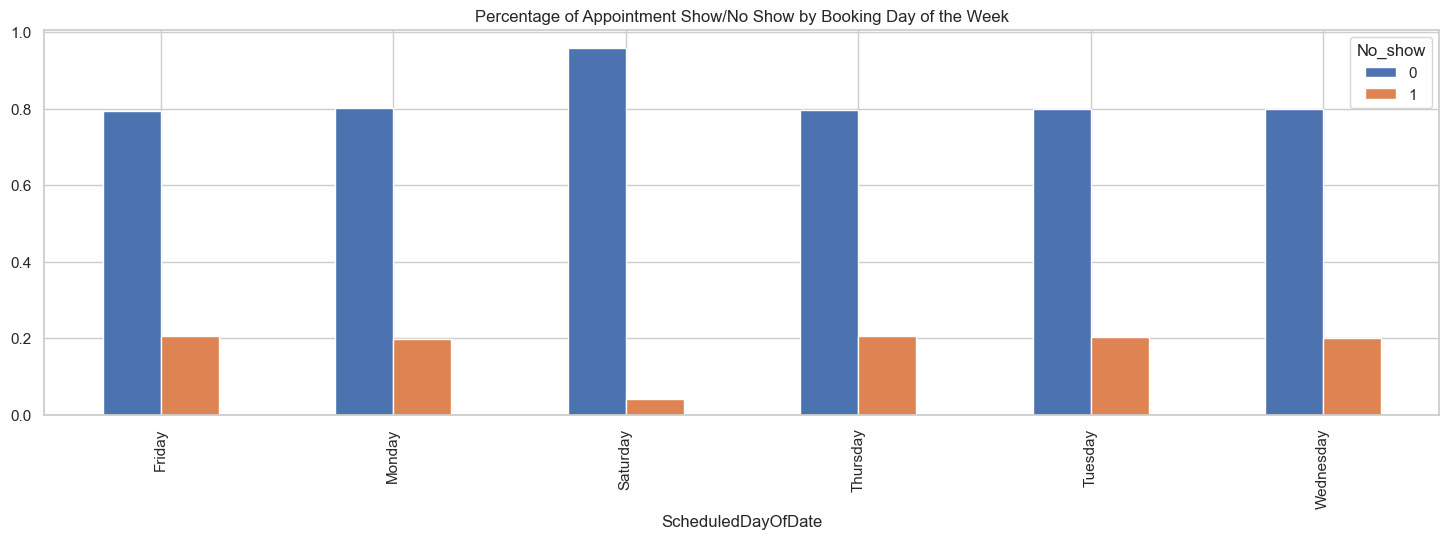

Percentage of Appointment Show/No Show by Booking Day of the Week
                    Showed Up  No-Show
ScheduledDayOfDate                    
Friday                  79.45    20.55
Monday                  80.25    19.75
Saturday                95.83     4.17
Thursday                79.53    20.47
Tuesday                 79.78    20.22
Wednesday               79.90    20.10


In [30]:
# split ScheduledDay into days of the week

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('ScheduledDayOfDate')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Booking Day of the Week")
plt.show()
# barchart showing number of show/ no-show by day of the week

day_of_week = df.groupby('ScheduledDayOfDate')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Booking Day of the Week")
plt.show()

print("Percentage of Appointment Show/No Show by Booking Day of the Week")
percentages = df.groupby('ScheduledDayOfDate')['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

Most of the bookings are at the beginning of the week, this may be explained because the medical centre seems not to be open over the weekends. Althoug Saturdays have the smallest no show rate, they also represents a too small proportion of the data to be significant. Overall, the days of the week do not seem to be an important feature.

### 5.8 Appointment Date

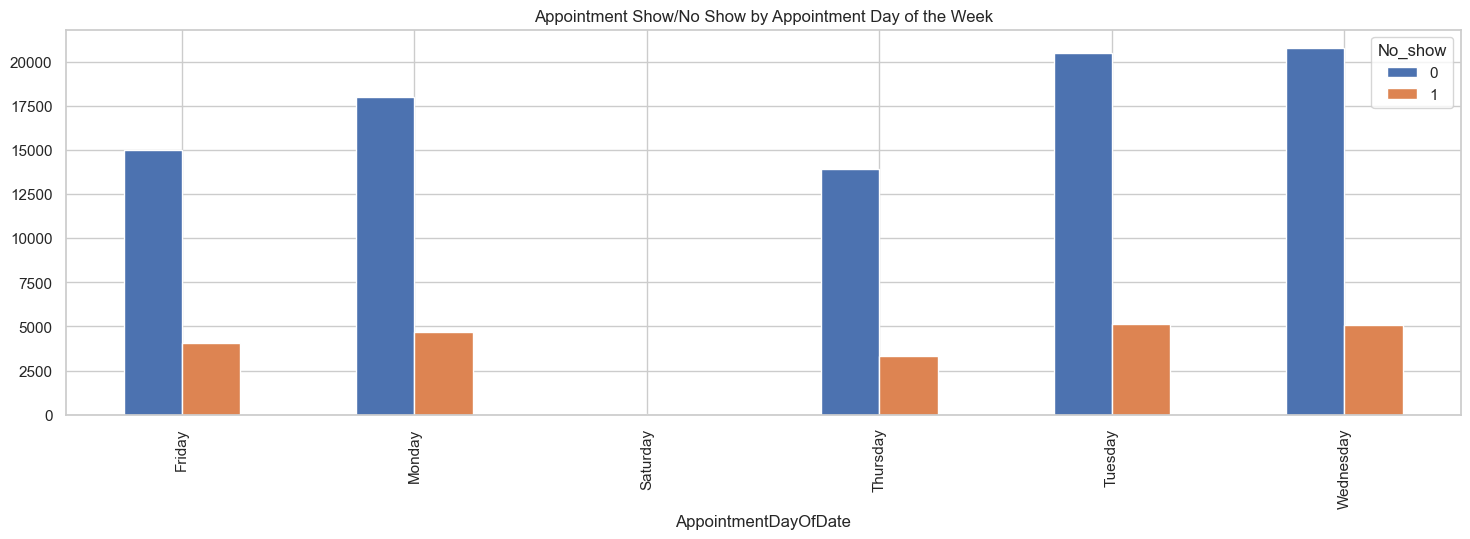

Percentage of Appointment Show/No Show by Appointment Day of the Week
                      Showed Up  No-Show
AppointmentDayOfDate                    
Friday                    78.77    21.23
Monday                    79.36    20.64
Saturday                  76.92    23.08
Thursday                  80.66    19.34
Tuesday                   79.91    20.09
Wednesday                 80.31    19.69


In [31]:
# split ScheduledDay into days of the week

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('AppointmentDayOfDate')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Appointment Day of the Week")
plt.show()

# barchart showing number of show/ no-show by day of the week
print("Percentage of Appointment Show/No Show by Appointment Day of the Week")
percentages = df.groupby('AppointmentDayOfDate')['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

The first graph follows the same patterns as section 5.6 "Appointment Show/No Show by Booking Day of the Week" graph. This may be because patient book and have their their appointment on the same day. The percentage of show vs no show dis roughly the same accross the week.

### 5.9 Waiting Time Between Booking and Medical Appointment

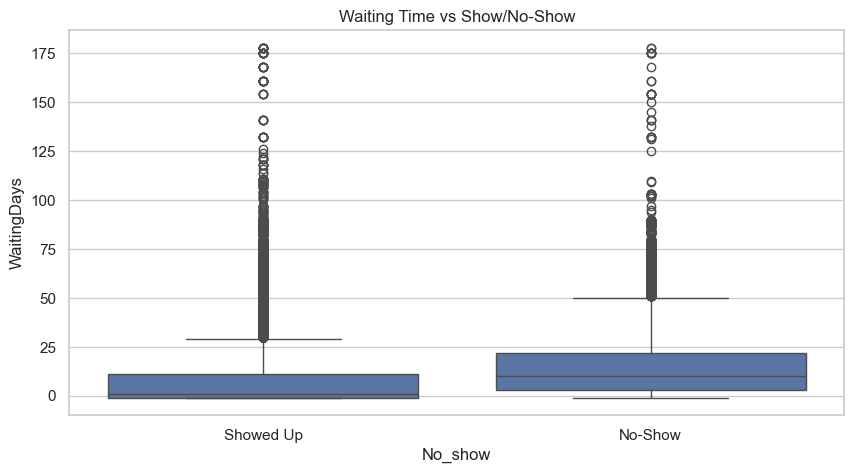

In [32]:
# 3. Waiting days vs no-show
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="No_show", y="WaitingDays")
plt.title("Waiting Time vs Show/No-Show")
plt.xticks([0, 1], ["Showed Up", "No-Show"])
plt.show()

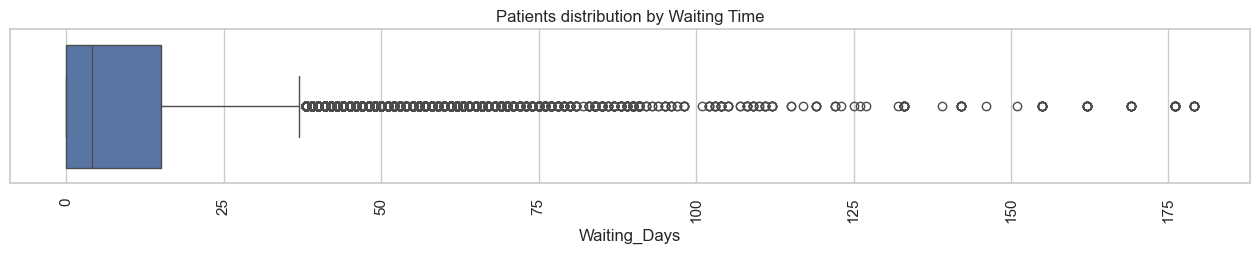

In [33]:
# calculate the number of days the booking has been taken before the appointmenet
# Convert to pandas datetime and keep full datetime64[ns]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()

# Now safely use .dt.days
df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


# Look at the distribution of Waiting_Days
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Waiting_Days)
dist_age.set_title("Patients distribution by Waiting Time")
plt.show()

Most of the appointments are taken a month in advance. The graph above, highlights erroneous data and outliars. The negative data will be transformed into 'unknown' wating time category while the outliars will be kept as some medical appointment can take up to six months (like small surgeries).

### 5.10 Days/Week Comparison

In [34]:
# create pre-appointment period groups using the distribution above
bins= [0,1,7,14,21,28,35,200]
labels = ['Same day','Less than a week','A week','Two weeks','Three weeks','A month','More than a month']
df['Pre_Appt_Period'] = pd.cut(df['Waiting_Days'], bins=bins, labels=labels, right=False)
# replace missing and erronous values with unknown
df['Pre_Appt_Period'] = df['Pre_Appt_Period'].cat.add_categories('unknown').fillna('unknown')

df.groupby(['Pre_Appt_Period'], observed=True)['PatientId'].count()

Pre_Appt_Period
Same day             38561
Less than a week     27277
A week               14018
Two weeks             9925
Three weeks           6859
A month               6229
More than a month     7647
Name: PatientId, dtype: int64

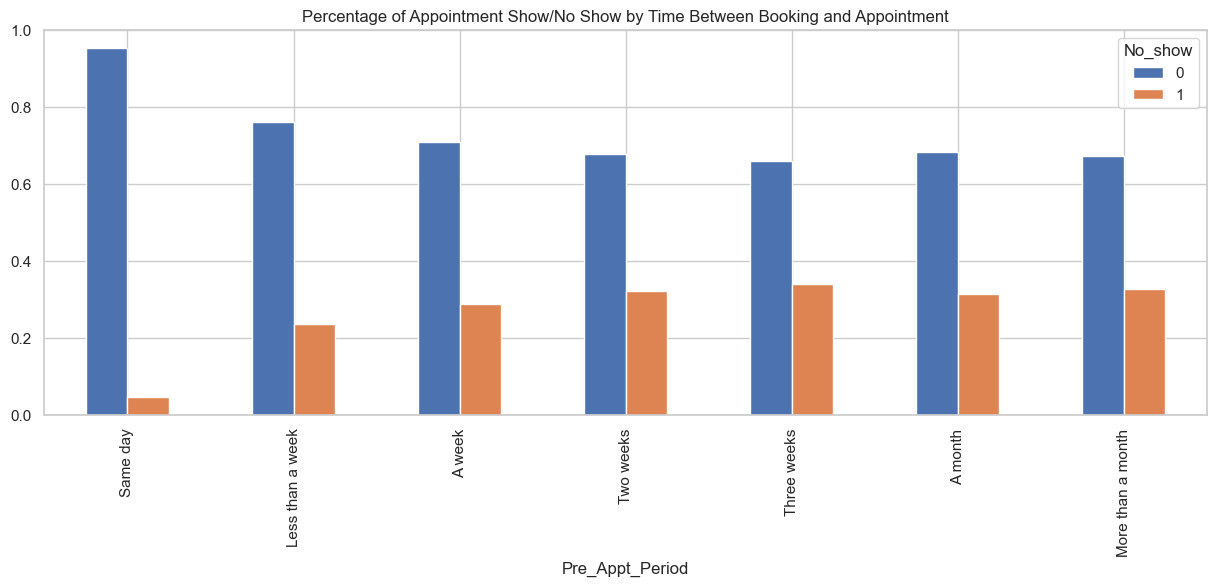

Percentage of Appointment Show/No Show by Time Between Booking and Appointment
                   Showed Up  No-Show
Pre_Appt_Period                      
Same day               95.35     4.65
Less than a week       76.31    23.69
A week                 71.04    28.96
Two weeks              67.77    32.23
Three weeks            66.04    33.96
A month                68.47    31.53
More than a month      67.23    32.77


In [35]:
# barchart showing number of show/ no-show in percentage by the amount of time between booking and appointment
psla = df.groupby('Pre_Appt_Period', observed=True)['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,5))
psla.set_title("Percentage of Appointment Show/No Show by Time Between Booking and Appointment")
plt.show()
print("Percentage of Appointment Show/No Show by Time Between Booking and Appointment")
percentages = df.groupby('Pre_Appt_Period', observed=True)['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

The graph above suggests that the longer the waiting time is between booking and the appointmnet the more likely the appointment is to be missed. This feature seems to be an important one as it shows a clear distinction for patients show/ no show depending on the number of days ahead of the appontment patients have booked.

#### We classify Lead Days into 6 categories

In [36]:
df_for_plots=df.copy()
def lead_day_category(LeadDay):
    if(LeadDay<=2):
        return 'Within 2 Days'
    elif(LeadDay>2 and LeadDay<=7):
        return 'Within 1 Week'
    elif(LeadDay>7 and LeadDay<=14):
        return 'Within 2 Weeks'
    elif(LeadDay>14 and LeadDay<=21):
        return 'Within 3 Weeks'
    elif(LeadDay>21 and LeadDay<=28):
        return 'Within 4 Weeks'
    elif(LeadDay>28):
        return 'After 1 Month'


# Creating a dataframe to calculate the percentage of people who miss their appointments, grouped by lead day category

In [37]:
df_for_plots['LeadDayCategory'] = df_for_plots.apply(lambda x: lead_day_category(x['LeadDays']), axis=1)

df_lead_days = df_for_plots.groupby(by=['LeadDayCategory', 'No_show'])['PatientId'].agg(['count']).rename(columns={'count':'LeadDayCount'})
df_lead_days.reset_index(inplace=True)
df_lead_days = df_lead_days[df_lead_days['No_show']==1]

df_total = df_for_plots[['LeadDayCategory', 'PatientId']]
df_total = df_total.groupby(by='LeadDayCategory')['PatientId'].agg(['count']).rename(columns={'count':'Total'})
df_total.reset_index(inplace=True)

df_lead_days = df_lead_days.merge(df_total, how='left', left_on=['LeadDayCategory'], right_on=['LeadDayCategory'])

df_lead_days['Percent'] = round((df_lead_days['LeadDayCount']*100) / df_lead_days['Total'], 2)
df_lead_days

,LeadDayCategory,No_show,LeadDayCount,Total,Percent
0,After 1 Month,1,3967,12170,32.60
1,Within 1 Week,1,5055,20245,24.97
2,Within 2 Days,1,4507,50499,8.92
3,Within 2 Weeks,1,3664,12025,30.47
4,Within 3 Weeks,1,2861,8873,32.24
5,Within 4 Weeks,1,2257,6704,33.67


# We subsitute the numerical values in column 'SmsReceived' to categorical values

In [38]:
df_for_plots['SMS_received'] = df_for_plots['SMS_received'].map({0:'SMS not received', 1:'SMS received'})

#### We consider 'Hypertension' and 'Diabetes' as Chronic illness and we classify Patients into 2 categories:
- Patients belonging to Age Category 5 and suffering from Chronic illness
- Patients belonging to Age Category 1-4 and suffering from Chronic illness

In [39]:
df_for_plots.loc[((df_for_plots['Hypertension'] == 1) | (df_for_plots['Diabetes'] == 1)) & (df_for_plots['AgeGroup']==5), 'Old_Chronic'] = 'OldChronic'
df_for_plots.loc[((df_for_plots['Hypertension'] == 1) | (df_for_plots['Diabetes'] == 1)) & (df_for_plots['AgeGroup']!=5), 'Old_Chronic'] = 'YoungChronic'

df_for_plots['Old_Chronic'] = df_for_plots['Old_Chronic'].fillna('Healthier')

df_for_plots.head()

Pct_Old_Chronic = round((df_for_plots[(df_for_plots['Old_Chronic']=='OldChronic') & (df_for_plots['No_show']==1)]['PatientId'].count() \
/ df_for_plots[df_for_plots['No_show']==1]['PatientId'].count()) * 100, 2)

Pct_Young_Chronic = round((df_for_plots[(df_for_plots['Old_Chronic']=='YoungChronic') & (df_for_plots['No_show']==1)]['PatientId'].count() \
/ df_for_plots[df_for_plots['No_show']==1]['PatientId'].count()) * 100, 2)

print("Patients belonging to Age Group 5 and suffering from Chronic illness: "+str(Pct_Old_Chronic))
print("Patients belonging to Age Group 1-4 and suffering from Chronic illness: "+str(Pct_Young_Chronic))

Patients belonging to Age Group 5 and suffering from Chronic illness: 0.0
Patients belonging to Age Group 1-4 and suffering from Chronic illness: 18.2


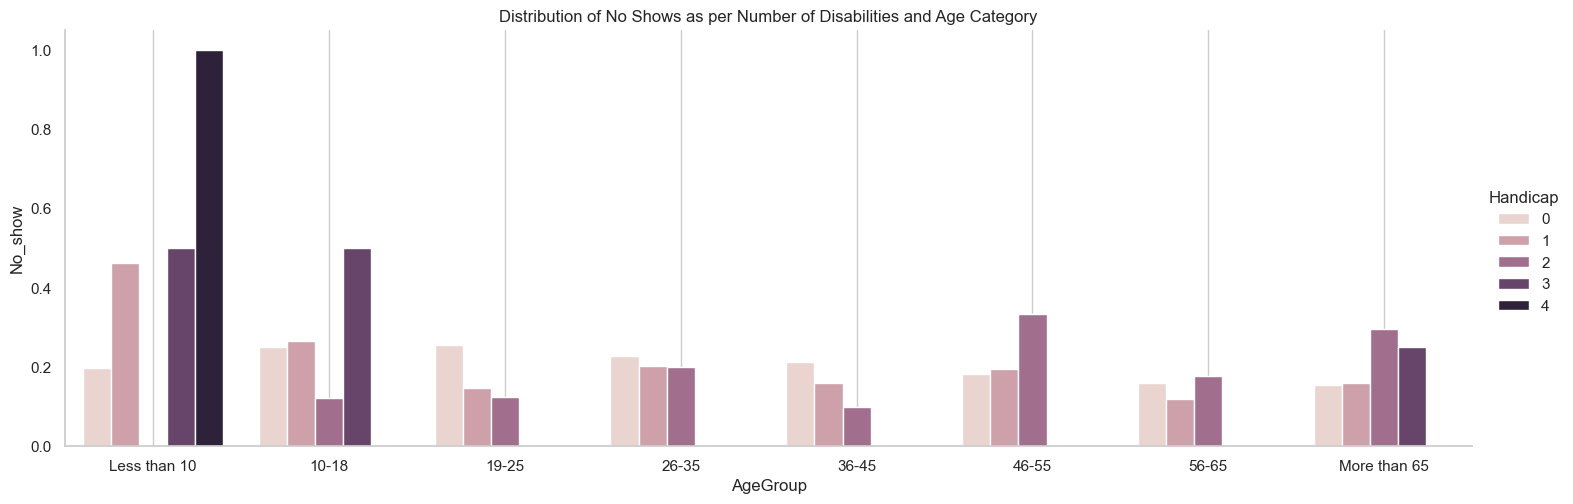

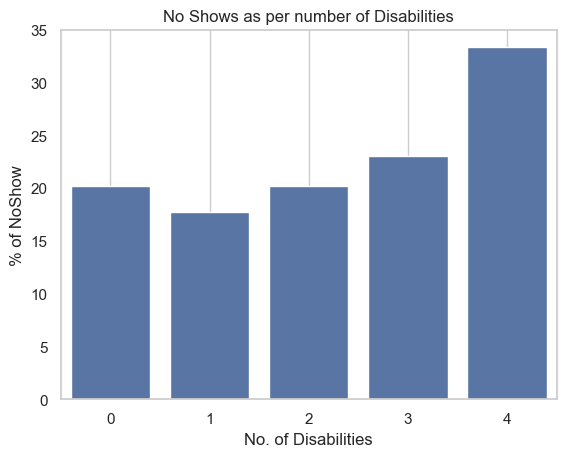

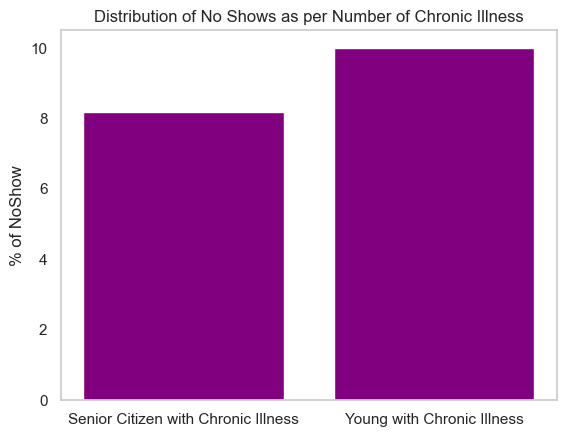

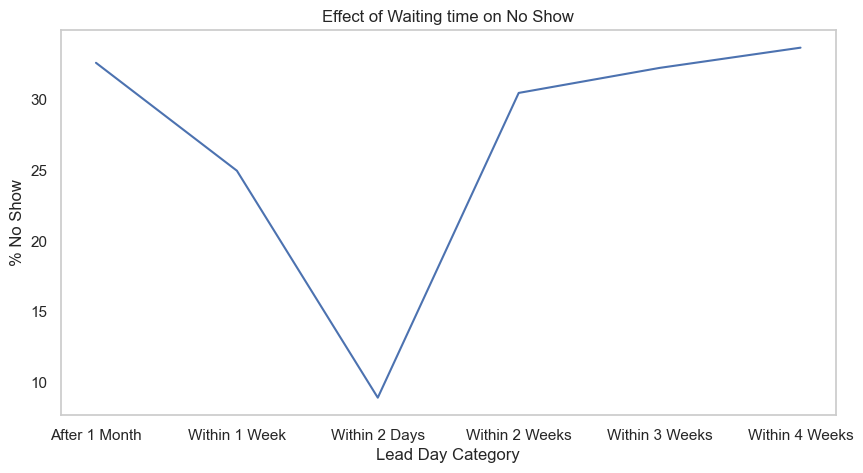

In [40]:

#Distribution of No Shows as per Number of Disabilities and Age Category':
sns.catplot(x='AgeGroup', y='No_show', hue='Handicap', data=df_for_plots, kind='bar', aspect=3, errorbar=None)
plt.title("Distribution of No Shows as per Number of Disabilities and Age Category")
plt.grid()
plt.show()
        

        
#No Shows as per number of Disabilities':
#fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.barplot(x=df_for_plots['Handicap'],y=df_for_plots['No_show']*100, errorbar=None)   
plt.xlabel("No. of Disabilities")
plt.ylabel("% of NoShow")
plt.title("No Shows as per number of Disabilities")
plt.grid()
plt.show()
        
#Distribution of No Shows as per Number of Chronic Illness
x = [8.19,10.0]
years = ['Senior Citizen with Chronic Illness', 'Young with Chronic Illness']
#plt.figure(figsize=(8,7))
plt.bar(years, x,color='Purple')
plt.ylabel("% of NoShow")
plt.title("Distribution of No Shows as per Number of Chronic Illness")
plt.grid()
plt.show()
        


#Effect of Waiting time on No Show
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_lead_days['LeadDayCategory'],y=df_lead_days['Percent'], errorbar=None)
plt.title("Effect of Waiting time on No Show")
plt.xlabel('Lead Day Category')
plt.ylabel('% No Show')
plt.grid()
plt.show()
    

### 5.11 Scholarship

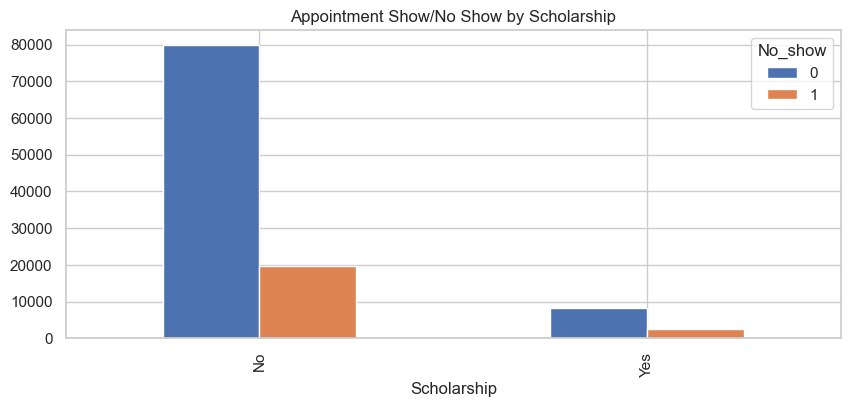

Percentage of Appointment Show/No Show by Scholarship
             Showed Up  No-Show
Scholarship                    
No               80.20    19.80
Yes              76.26    23.74


In [41]:
# barchart showing number of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Scholarship")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# barchart showing the percentage of show/ no-show by Scholarship
print("Percentage of Appointment Show/No Show by Scholarship")
percentages = df.groupby(df['Scholarship'].map({0: 'No', 1: 'Yes'}))['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

The graphs above shows that 80% of the patients that do not have a scholarship attended their appointent while 75% of the patient with a scholarship attended. This feature could be helpful in dertermining the no show.

### 5.12 Hypertension

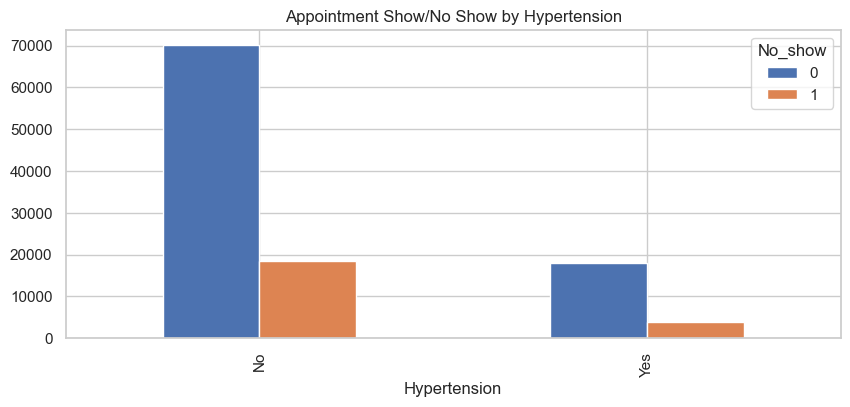

Percentage of Appointment Show/No Show by Hypertension
              Showed Up  No-Show
Hypertension                    
No                 79.1     20.9
Yes                82.7     17.3


In [42]:
# barchart showing number of show/ no-show by Hypertension
day_of_week = df.groupby('Hypertension')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Hypertension")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# barchart showing the percentage of show/ no-show by Hypertension
print("Percentage of Appointment Show/No Show by Hypertension")
percentages = df.groupby(df['Hypertension'].map({0: 'No', 1: 'Yes'}))['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

The patients suffering from hypertension tend to attend their appointment more often than those who do not have this condition. However, appointment with hypertension patients represent a small pool in our dataset, just under 20% of the total appointments. This feature could be helpful in dertermining the no show.

### 5.13 Diabetes

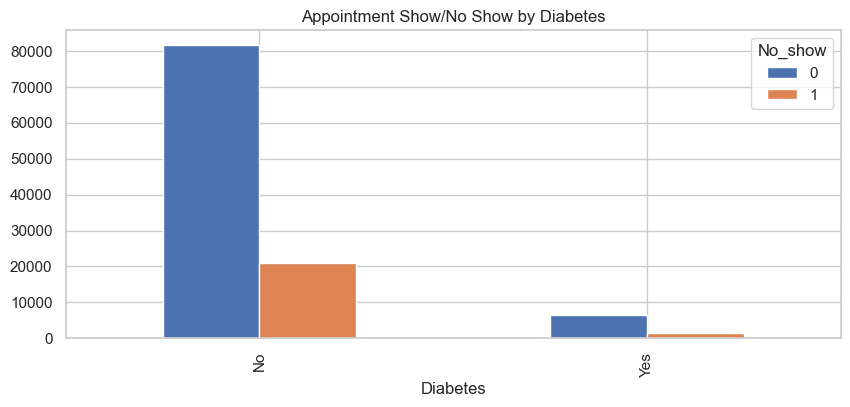

Percentage of Appointment Show/No Show by Diabetes
          Showed Up  No-Show
Diabetes                    
No            79.64    20.36
Yes           82.00    18.00


In [43]:
# barchart showing number of show/ no-show by Diabetes
day_of_week = df.groupby('Diabetes')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Diabetes")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# barchart showing the percentage of show/ no-show by Diabetes
print("Percentage of Appointment Show/No Show by Diabetes")
percentages = df.groupby(df['Diabetes'].map({0: 'No', 1: 'Yes'}))['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

The patients suffering from Diabetes tend to attend their appointment more often than those who do not have this condition. This feature may not be helpful in dertermining the no show.

### 5.14 Alcoholism

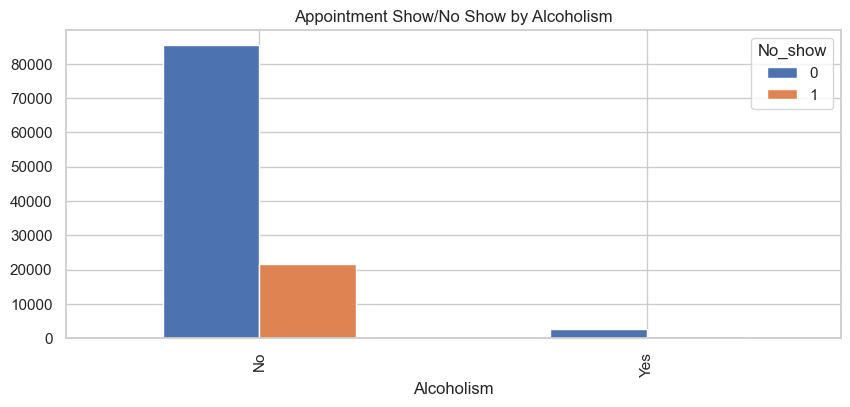

Percentage of Appointment Show/No Show by Alcoholism
            Showed Up  No-Show
Alcoholism                    
No              79.81    20.19
Yes             79.85    20.15


In [44]:
# barchart showing number of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Alcoholism")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# barchart showing the percentage of show/ no-show by Alcoholism
print("Percentage of Appointment Show/No Show by Alcoholism")
percentages = df.groupby(df['Alcoholism'].map({0: 'No', 1: 'Yes'}))['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

Looking at the graph above, there does not seem to be a difference between the patient suffering from alcoholism and the rest of the dataset. This feature may not be helpful in dertermining the no show.

### 5.15 Handicap

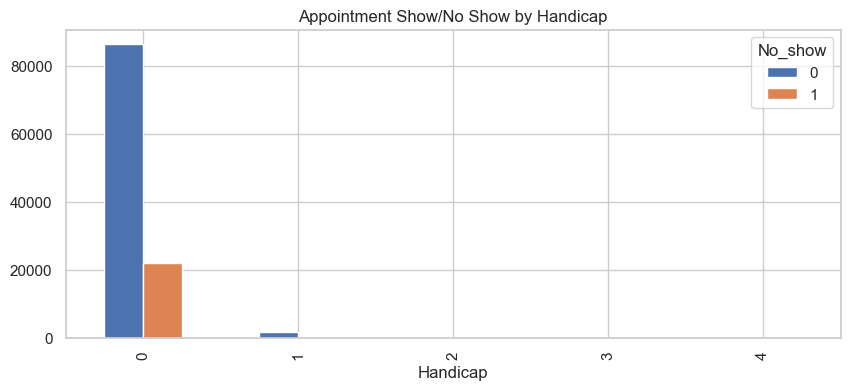

Percentage of Appointment Show/No Show by Hadicap
          Showed Up  No-Show
Handicap                    
0             79.77    20.23
1             82.27    17.73
2             79.78    20.22
3             76.92    23.08
4             66.67    33.33


In [45]:
# barchart showing number of show/ no-show by Hnadicap
day_of_week = df.groupby('Handicap')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Handicap")
plt.show()

# barchart showing the percentage of show/ no-show by Handicap
print("Percentage of Appointment Show/No Show by Hadicap")
percentages = df.groupby('Handicap')['No_show'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Showed Up', 'No-Show']  # Optional: rename columns
print(percentages.round(2))  # Round to 2 decimal places

Patients suffering from a handicap represent 2% of the total appointments.

# 📌 Hypothesis 1: Do Males tend to miss more appointments than Females?

Hypothesis 1 - Gender Analysis:
         Total_Appointments  Missed_Appointments  Percentage_Missed
Gender                                                            
0                    71831                14588               20.3
1                    38685                 7723               20.0


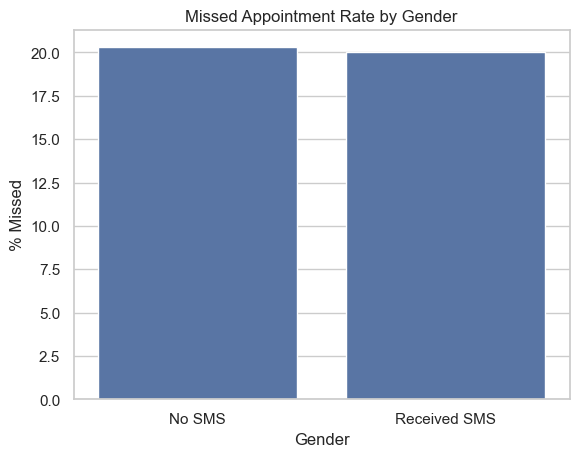

In [46]:


# Group by Gender and calculate missed appointments
gender_analysis = df.groupby('Gender').agg(
    Total_Appointments=('No_show', 'count'),
    Missed_Appointments=('No_show', 'sum')
)
gender_analysis['Percentage_Missed'] = round(gender_analysis['Missed_Appointments'] / gender_analysis['Total_Appointments'] * 100, 1)

print("Hypothesis 1 - Gender Analysis:\n", gender_analysis)

# Gender plot
gender_analysis.reset_index(inplace=True)
sns.barplot(data=gender_analysis, x='Gender', y='Percentage_Missed')
plt.title('Missed Appointment Rate by Gender')
plt.xticks([0, 1], ["No SMS", "Received SMS"])
plt.ylabel('% Missed')
plt.show()

# 📌 Hypothesis 2: Is there a relationship between schedule-appointment day difference and no-show?

Hypothesis 2 - Days Difference Analysis:
                 Total_Appointments  Missed_Appointments  Percentage_Missed
DaysDifference                                                            
0                            38561                 1792                4.6
1                             5213                 1113               21.4
2                             6725                 1602               23.8
3                             2735                  642               23.5
4                             5290                 1231               23.3
5                             3277                  872               26.6
6                             4037                 1001               24.8
7                             4906                 1309               26.7
8                             2332                  670               28.7
9                             1605                  440               27.4


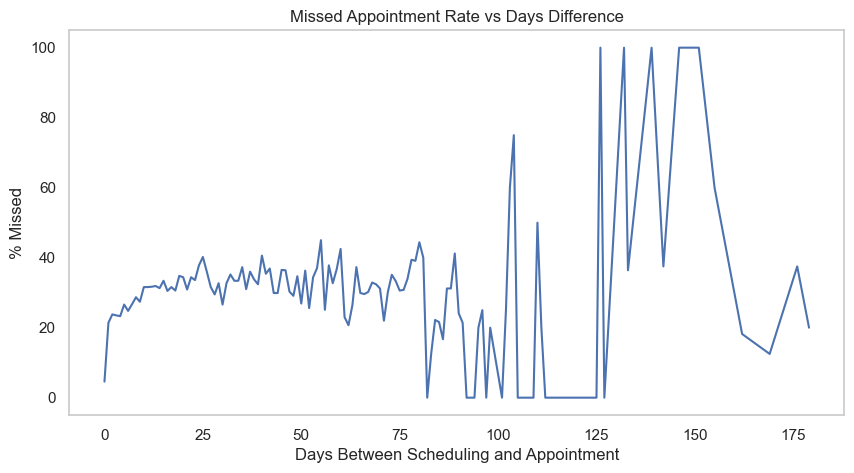

In [47]:
# Calculate days difference
df['DaysDifference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Group by DaysDifference
time_diff_analysis = df.groupby('DaysDifference').agg(
    Total_Appointments=('No_show', 'count'),
    Missed_Appointments=('No_show', 'sum')
)
time_diff_analysis['Percentage_Missed'] = round(time_diff_analysis['Missed_Appointments'] / time_diff_analysis['Total_Appointments'] * 100, 1)

print("Hypothesis 2 - Days Difference Analysis:\n", time_diff_analysis.head(10))  # Display sample row

# DaysDifference line plot
time_diff_analysis.reset_index(inplace=True)
plt.figure(figsize=(10, 5))
sns.lineplot(data=time_diff_analysis, x='DaysDifference', y='Percentage_Missed')
plt.title('Missed Appointment Rate vs Days Difference')
plt.ylabel('% Missed')
plt.xlabel('Days Between Scheduling and Appointment')
plt.grid()
plt.show()

# 📌 Hypothesis 3: Is no-show common among adult patients aged 18–30?

Hypothesis 3 - Age Group Analysis:
           Total_Appointments  Missed_Appointments  Percentage_Missed
AgeGroup                                                            
0-12                   21035                 4306               20.5
13-17                   6343                 1690               26.6
18-30                  18250                 4491               24.6
31-50                  29471                 6101               20.7
50+                    35417                 5723               16.2


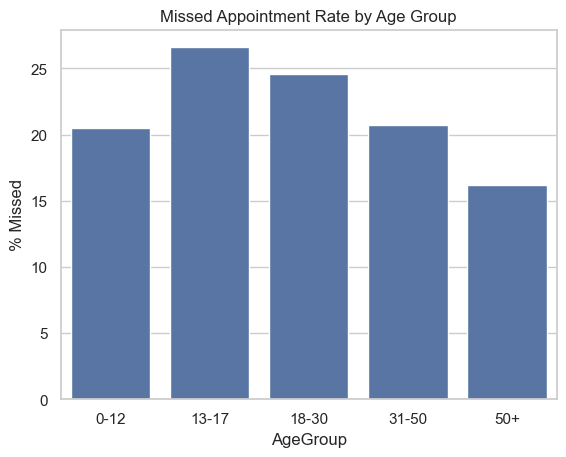

In [48]:
# Create age groups
def age_group(age):
    if 0 <= age <= 12:
        return '0-12'
    elif 13 <= age <= 17:
        return '13-17'
    elif 18 <= age <= 30:
        return '18-30'
    elif 31 <= age <= 50:
        return '31-50'
    else:
        return '50+'

df['AgeGroup'] = df['Age'].apply(age_group)

# Group by AgeGroup
age_group_analysis = df.groupby('AgeGroup').agg(
    Total_Appointments=('No_show', 'count'),
    Missed_Appointments=('No_show', 'sum')
)
age_group_analysis['Percentage_Missed'] = round(age_group_analysis['Missed_Appointments'] / age_group_analysis['Total_Appointments'] * 100, 1)

print("Hypothesis 3 - Age Group Analysis:\n", age_group_analysis)

# Age group plot
age_group_analysis.reset_index(inplace=True)
sns.barplot(data=age_group_analysis, x='AgeGroup', y='Percentage_Missed', order=['0-12', '13-17', '18-30', '31-50', '50+'])
plt.title('Missed Appointment Rate by Age Group')
plt.ylabel('% Missed')
plt.show()